<a href="https://colab.research.google.com/github/hamisB/machine-learning/blob/master/NetflixMovieRecommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import librairies & Data

In [1]:
# import librairies 
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight") 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import pandas_profiling as pp

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv('https://storage.googleapis.com/source_market_fr/data_for_ml/netflix_titles.csv')

In [8]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB
None


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


## Data Analysis

In [0]:
# Copy data
dataset = data.copy()

In [10]:
# Type of Movie 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


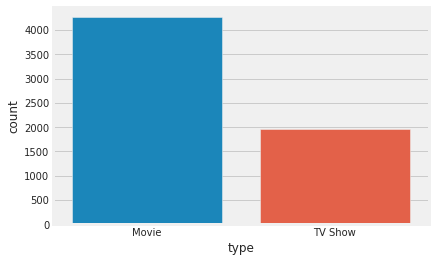

In [13]:
# Countplot type of content
sns.countplot(x="type", data=dataset)

In [66]:
# Get duration
dataset['duration_'] = dataset['duration'].apply(lambda x: x.split(' ')[0])
dataset['date_added'] = pd.to_datetime(dataset.date_added)
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,90
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,94
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",1
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,1
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,99


In [75]:
dataset['year_added'] = dataset.date_added.dt.year
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,90,2019.0
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,94,2016.0
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",1,2018.0
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,1,2018.0
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,99,2017.0


In [77]:
dataset.groupby('year_added')['show_id'].count().reset_index()

,year_added,show_id
0,2008.0,2
1,2009.0,2
2,2010.0,1
3,2011.0,13
4,2012.0,7
5,2013.0,12
6,2014.0,25
7,2015.0,90
8,2016.0,456
9,2017.0,1300


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
 12  duration_     6234 non-null   int64 
dtypes: int64(3), object(10)
memory usage: 633.3+ KB


In [0]:
# From object to int 
dataset['duration_'] = dataset['duration_'].astype('int')

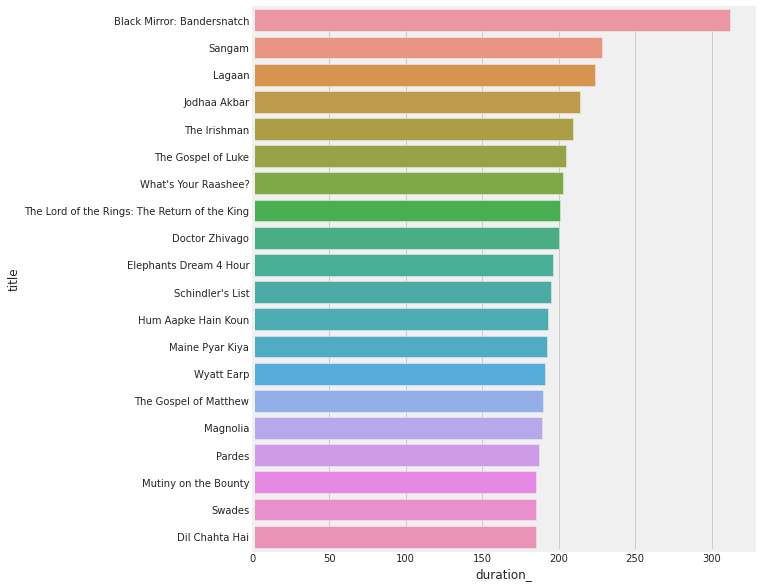

In [44]:
# Movie Avg Duration
plt.figure(figsize=(8,10))
sns.barplot(x='duration_', y='title',orient='h', data= dataset[dataset['type']=="Movie"][['title','duration_']].sort_values('duration_', ascending=False).head(20))

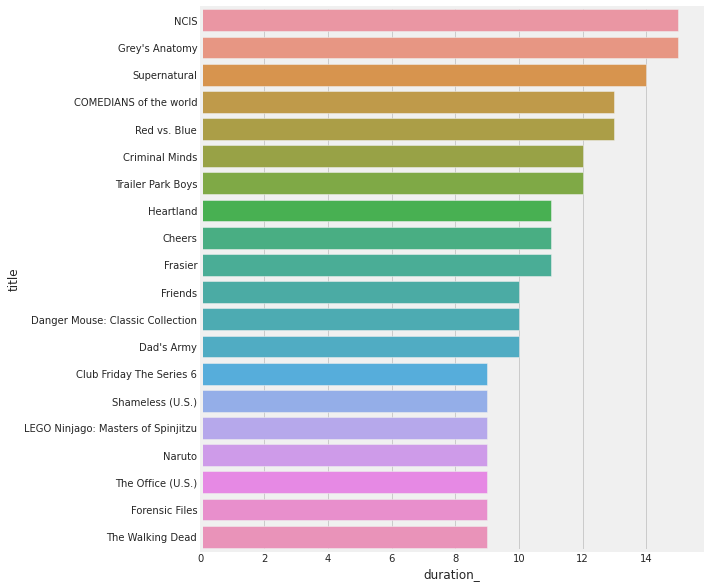

In [50]:
# TV Show Avg Duration
plt.figure(figsize=(8,10))
sns.barplot(x='duration_', y='title',orient='h', data= dataset[dataset['type']=="TV Show"][['title','duration_']].sort_values('duration_', ascending=False).head(20))

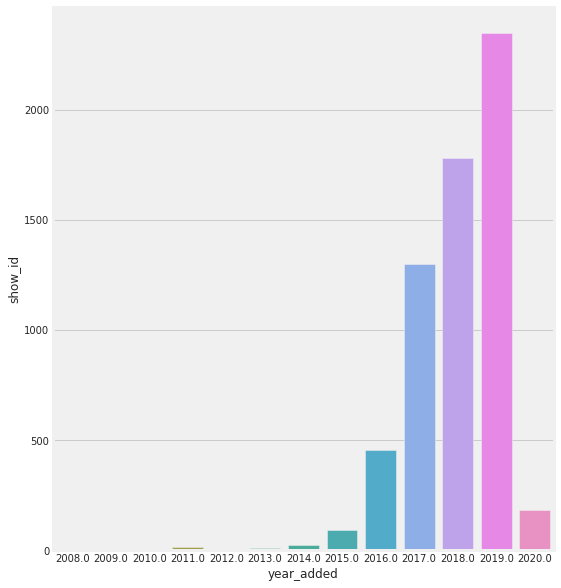

In [78]:
# Content Added by year
plt.figure(figsize=(8,10))
sns.barplot(x='year_added', y='show_id',orient='v', data= dataset.groupby('year_added')['show_id'].count().reset_index())

In [79]:
dataset.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,90,2019.0


## Content Recommender

In [82]:
dataset['content']=dataset['cast']+dataset['listed_in']+dataset['description']
dataset.set_index('title', inplace=True)
dataset[['content']]

,content
title,
Norm of the North: King Sized Adventure,"Alan Marriott, Andrew Toth, Brian Dobson, Cole..."
Jandino: Whatever it Takes,Jandino AsporaatStand-Up ComedyJandino Asporaa...
Transformers Prime,"Peter Cullen, Sumalee Montano, Frank Welker, J..."
Transformers: Robots in Disguise,"Will Friedle, Darren Criss, Constance Zimmer, ..."
#realityhigh,"Nesta Cooper, Kate Walsh, John Michael Higgins..."
...,...
Red vs. Blue,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G..."
Maron,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh..."
Little Baby Bum: Nursery Rhyme Friends,NaN


In [0]:
dataset_ml = dataset[['content']]

In [0]:
# Drop NaN value
dataset_ml.dropna(inplace=True)

In [85]:
# Shape of dataset_ml
dataset_ml.shape

(5664, 1)

In [86]:
# Import NLTK and TfidVectorizer
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
# Processing function
STOPWORDS = set(nltk.corpus.stopwords.words('english'))
STEMMER = nltk.stem.SnowballStemmer('english')
# Cleaning function
def clean_text(text):
    text_lower = text.lower()
    text_clean = re.sub('[^a-z_]', ' ', text_lower)
    tokens = [w for w in text_clean.split() if (len(w)>2) and (w not in STOPWORDS)]
    tokens_stem = [ STEMMER.stem(token) for token in tokens]
    return tokens_stem

In [0]:
# Create a vectorizer with 100 features 
vectorizer = TfidfVectorizer( tokenizer=clean_text , max_features=10000, ngram_range=(1,2))

In [90]:
# Create the Tdif matrix and check the feature
df_tdif = vectorizer.fit_transform(dataset_ml.content)
vectorizer.get_feature_names()[:25]

['aakash',
 'aamir',
 'aamir bashir',
 'aamir khan',
 'aaron',
 'aaron eckhart',
 'aaron jefferi',
 'aaron paul',
 'aaron yan',
 'aaryan',
 'abad',
 'abandon',
 'abba',
 'abbey',
 'abbi',
 'abbi cornish',
 'abbott',
 'abd',
 'abdel',
 'abdel aziz',
 'abdelaziz',
 'abdelilah',
 'abdelilah wahbi',
 'abduct',
 'abdul']

In [0]:
# Calcul similarity 
from sklearn.metrics.pairwise import linear_kernel
similarity = linear_kernel(df_tdif, df_tdif)
sim_score = pd.DataFrame(similarity, index=dataset_ml.index , columns=dataset_ml.index)

In [109]:
sim_score["Spartacus"].sort_values(ascending=False)[1:11]

title
Shooter                         0.144251
The Shannara Chronicles         0.142672
Ash vs. Evil Dead               0.135897
Fauda                           0.134070
Be Here Now                     0.128258
Raising Dion                    0.124545
Simplemente Manu NNa            0.123714
Thieves of the Wood             0.118315
Kurt & Courtney                 0.113911
All Hail King Julien: Exiled    0.113797
Name: Spartacus, dtype: float64